In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 사용

## 데이터 수집

In [3]:
# 데이터 소스를 확보하세요
df = pd.read_csv('시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv',encoding='cp949')

## 1. 초기데이터 확인

### 1-1. 데이터스키마 확인

In [4]:
df.columns

Index(['진료년도', '상별구분', '시도', '시군구', '성별', '연령구분', '환자수', '입내원일수', '요양급여비용'], dtype='object')

[작성기준(정신질환)](작성기준(정신질환).xlsx)

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [5]:
df.shape

(165000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   진료년도    165000 non-null  int64 
 1   상별구분    165000 non-null  object
 2   시도      165000 non-null  object
 3   시군구     165000 non-null  object
 4   성별      165000 non-null  object
 5   연령구분    165000 non-null  object
 6   환자수     165000 non-null  int64 
 7   입내원일수   165000 non-null  int64 
 8   요양급여비용  165000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 11.3+ MB


* 기초통계항목

In [7]:
df.describe()

,진료년도,환자수,입내원일수,요양급여비용
count,165000.000000,165000.000000,165000.000000,1.650000e+05
mean,2020.000000,86.157673,621.043145,3.860845e+07
std,1.414218,193.002516,1406.831330,1.029413e+08
min,2018.000000,0.000000,0.000000,0.000000e+00
25%,2019.000000,0.000000,0.000000,0.000000e+00
50%,2020.000000,10.000000,21.000000,3.747500e+05
75%,2021.000000,79.000000,618.000000,3.038176e+07
max,2022.000000,6311.000000,48418.000000,5.132790e+09


In [8]:
df.describe(include = 'object')

,상별구분,시도,시군구,성별,연령구분
count,165000,165000,165000,165000,165000
unique,6,17,249,2,11
top,ADHD,경기,고성군,남,0~9세
freq,27500,27720,1320,82500,15000


## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [9]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환 등)
# 권역을 추가하자.


In [10]:
df.시도.unique()

array(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '세종'], dtype=object)

In [11]:
df.insert(loc = 2, column = '권역', value = df.시도.replace(['경북','경남','울산','부산','대구'],'영남권').replace(['대전','광주','전북','전남'],'호남권').replace(['서울','인천','경기'],'수도권').replace(['충남','충북','세종'],'충청권') )
df.head()

,진료년도,상별구분,권역,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,수도권,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,수도권,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,수도권,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,수도권,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,수도권,서울,강남구,남,40~49세,55,357,21611080


In [12]:
# 요양급여비용을 십만단위로 절삭

In [13]:
df.insert(loc = 9, column = '요양급여비용_십만', value = (df.요양급여비용//100000))

In [14]:
df.head()

,진료년도,상별구분,권역,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용_십만,요양급여비용
0,2018,ADHD,수도권,서울,강남구,남,0~9세,437,3330,1888,188836790
1,2018,ADHD,수도권,서울,강남구,남,10~19세,1111,8869,5634,563498480
2,2018,ADHD,수도권,서울,강남구,남,20~29세,456,3485,2132,213248290
3,2018,ADHD,수도권,서울,강남구,남,30~39세,174,1357,727,72761750
4,2018,ADHD,수도권,서울,강남구,남,40~49세,55,357,216,21611080


In [15]:
df.권역.unique()

array(['수도권', '영남권', '호남권', '강원', '충청권', '제주'], dtype=object)

### 2-2. 데이터 클리닝

In [16]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [17]:
missing_values = df.isnull().any()  
column_missing_values = missing_values[ missing_values == True ]
column_missing_values

Series([], dtype: bool)

In [18]:
df[df.isnull().any(axis=1)]

,진료년도,상별구분,권역,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용_십만,요양급여비용


환자수, 입내원일수, 요양급여비용에 실데이터 상으로 0명인 행이 존재했다.

* 결측치 보정

In [19]:
# df['나이'] = df['나이'].fillna(0)

In [20]:
# df = df.fillna(0)

* 중복값 삭제 (필요시)

In [21]:
df[df.duplicated(keep=False)]

,진료년도,상별구분,권역,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용_십만,요양급여비용


In [22]:
# df.drop_duplicates(inplace=True)

## 3. 초기데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   진료년도       165000 non-null  int64 
 1   상별구분       165000 non-null  object
 2   권역         165000 non-null  object
 3   시도         165000 non-null  object
 4   시군구        165000 non-null  object
 5   성별         165000 non-null  object
 6   연령구분       165000 non-null  object
 7   환자수        165000 non-null  int64 
 8   입내원일수      165000 non-null  int64 
 9   요양급여비용_십만  165000 non-null  int64 
 10  요양급여비용     165000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

In [24]:
df.describe()

,진료년도,환자수,입내원일수,요양급여비용_십만,요양급여비용
count,165000.000000,165000.000000,165000.000000,165000.000000,1.650000e+05
mean,2020.000000,86.157673,621.043145,385.833455,3.860845e+07
std,1.414218,193.002516,1406.831330,1029.319406,1.029413e+08
min,2018.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2019.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2020.000000,10.000000,21.000000,3.000000,3.747500e+05
75%,2021.000000,79.000000,618.000000,303.000000,3.038176e+07
max,2022.000000,6311.000000,48418.000000,51327.000000,5.132790e+09


In [25]:
df.describe(include= 'object')

,상별구분,권역,시도,시군구,성별,연령구분
count,165000,165000,165000,165000,165000,165000
unique,6,6,17,249,2,11
top,ADHD,수도권,경기,고성군,남,0~9세
freq,27500,50820,27720,1320,82500,15000


### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
  (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)
* 시각화한 차트에 대한 분석

#### 분석 데이터

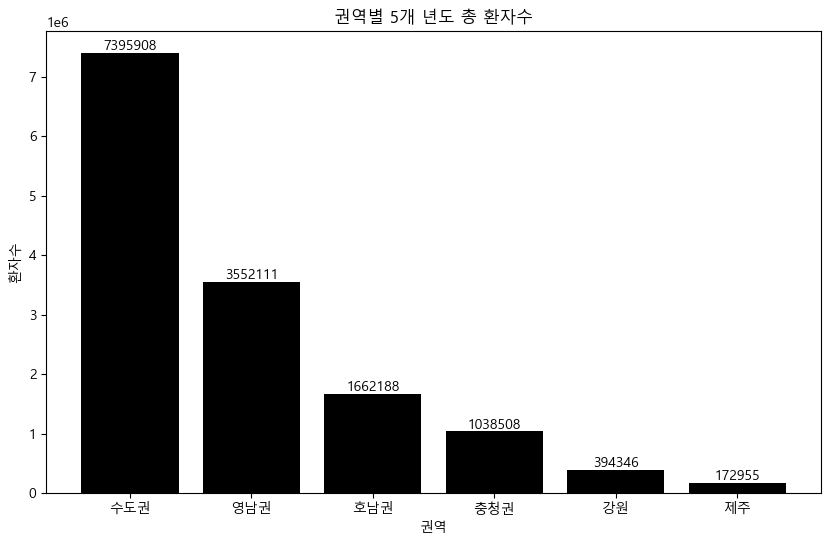

In [37]:
top_regions = df.groupby('권역')['환자수'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_regions.index, top_regions.values, color='k')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom')
    
plt.title('권역별 5개 년도 총 환자수') 
plt.xlabel('권역')
plt.ylabel('환자수')
plt.show()

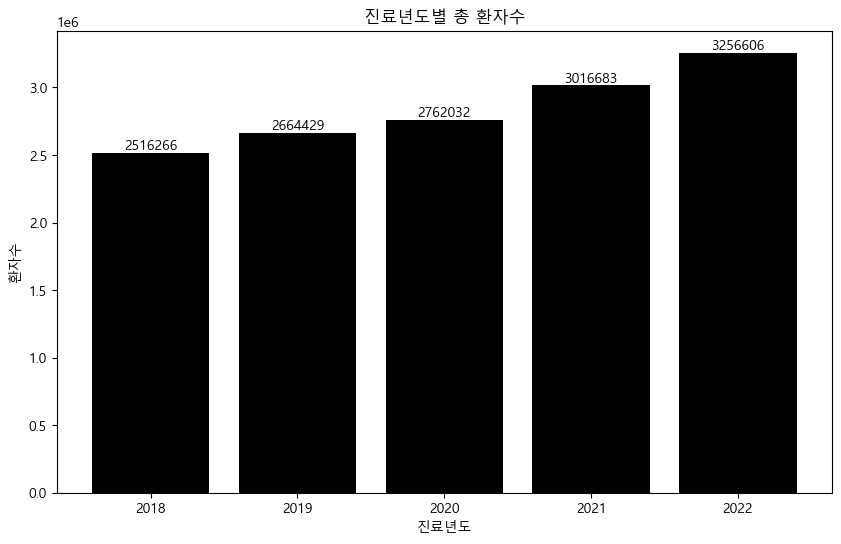

In [40]:
top_regions = df.groupby('진료년도')['환자수'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_regions.index, top_regions.values, color='k')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom')
    
plt.title('진료년도별 총 환자수')

plt.xlabel('진료년도')
plt.ylabel('환자수')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0~9세'),
  Text(1, 0, '10~19세'),
  Text(2, 0, '20~29세'),
  Text(3, 0, '30~39세'),
  Text(4, 0, '40~49세'),
  Text(5, 0, '50~59세'),
  Text(6, 0, '60~69세'),
  Text(7, 0, '70~79세'),
  Text(8, 0, '80~89세'),
  Text(9, 0, '90~99세'),
  Text(10, 0, '100세 이상')])

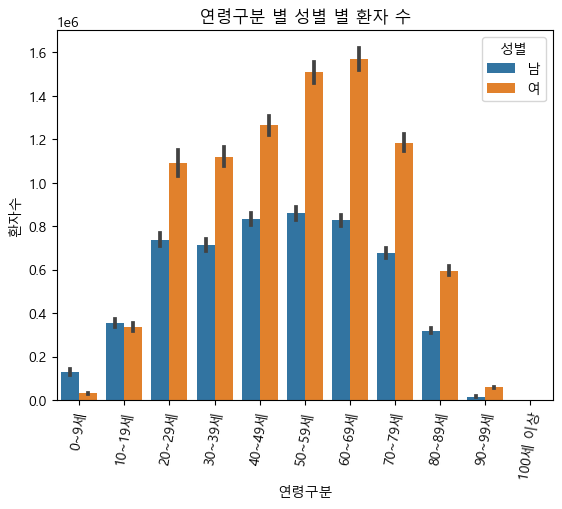

In [28]:
sns.barplot(data=df, x="연령구분", y="환자수", hue = '성별',estimator=sum)
plt.title('연령구분 별 성별 별 환자 수',loc='center')
plt.xticks(rotation=80)

Text(0.5, 1.0, '상별구분 별 성별 별 입내원일수 ')

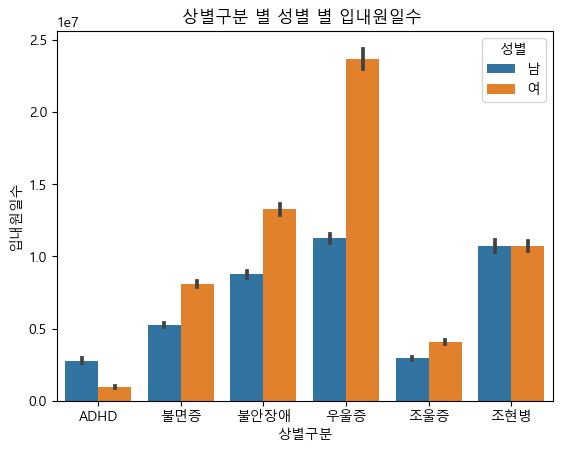

In [29]:
sns.barplot(data=df, x="상별구분", y="입내원일수",hue = '성별',estimator=sum)
plt.title('상별구분 별 성별 별 입내원일수 ',loc='center')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '수도권'),
  Text(1, 0, '영남권'),
  Text(2, 0, '호남권'),
  Text(3, 0, '강원'),
  Text(4, 0, '충청권'),
  Text(5, 0, '제주')])

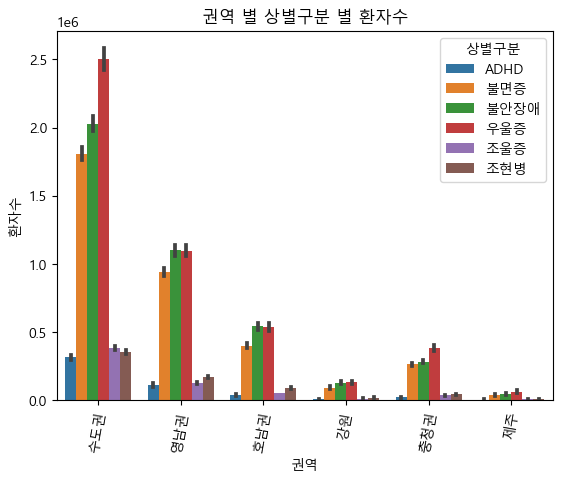

In [30]:

sns.barplot(data=df, x="권역", y="환자수", hue = '상별구분',estimator=sum)
plt.title('권역 별 상별구분 별 환자수',loc='center')
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '수도권'),
  Text(1, 0, '영남권'),
  Text(2, 0, '호남권'),
  Text(3, 0, '강원'),
  Text(4, 0, '충청권'),
  Text(5, 0, '제주')])

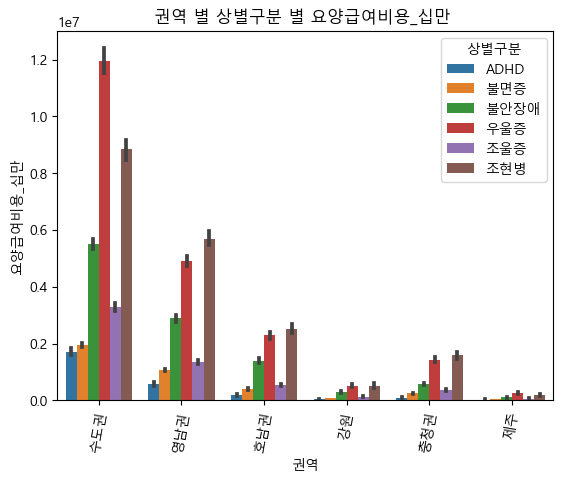

In [31]:
sns.barplot(data=df, x="권역", y="요양급여비용_십만",hue = '상별구분',estimator=sum)
plt.title('권역 별 상별구분 별 요양급여비용_십만 ',loc='center')
plt.xticks(rotation=80)

Text(0.5, 1.0, '입내원일수 별 성별 별 요양급여비용_십만')

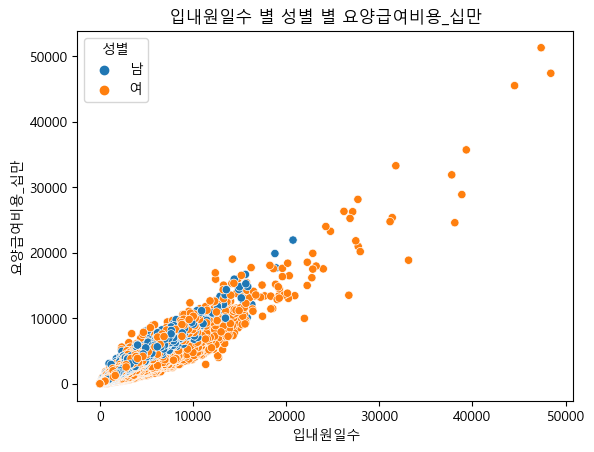

In [32]:
sns.scatterplot(data=df, x="입내원일수", y="요양급여비용_십만",hue = '성별')
plt.title('입내원일수 별 성별 별 요양급여비용_십만',loc='center')


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '진료년도 별 상별구분 별 평균 환자 수')

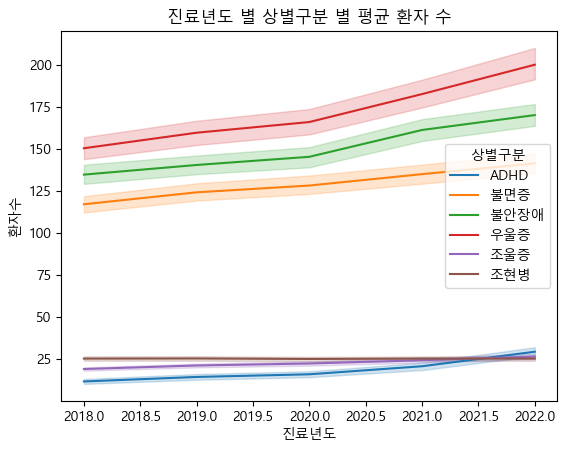

In [33]:
sns.lineplot(data=df, x="진료년도", y="환자수", hue = '상별구분')
plt.title('진료년도 별 상별구분 별 평균 환자 수',loc='center')


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '진료년도 별 상별구분 별 평균 입내원일수')

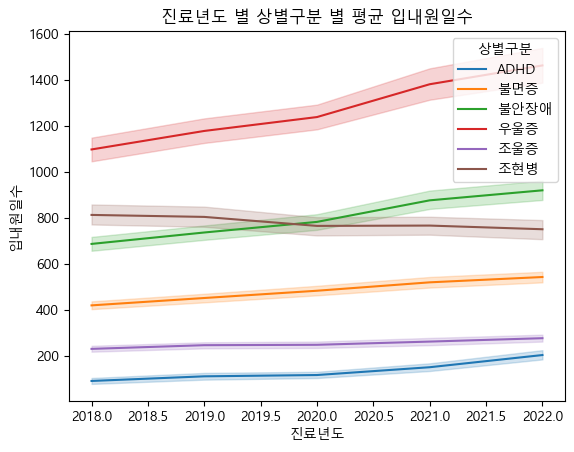

In [34]:
sns.lineplot(data=df, x="진료년도", y="입내원일수", hue = '상별구분')
plt.title('진료년도 별 상별구분 별 평균 입내원일수',loc='center')


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0~9세'),
  Text(1, 0, '10~19세'),
  Text(2, 0, '20~29세'),
  Text(3, 0, '30~39세'),
  Text(4, 0, '40~49세'),
  Text(5, 0, '50~59세'),
  Text(6, 0, '60~69세'),
  Text(7, 0, '70~79세'),
  Text(8, 0, '80~89세'),
  Text(9, 0, '90~99세'),
  Text(10, 0, '100세 이상')])

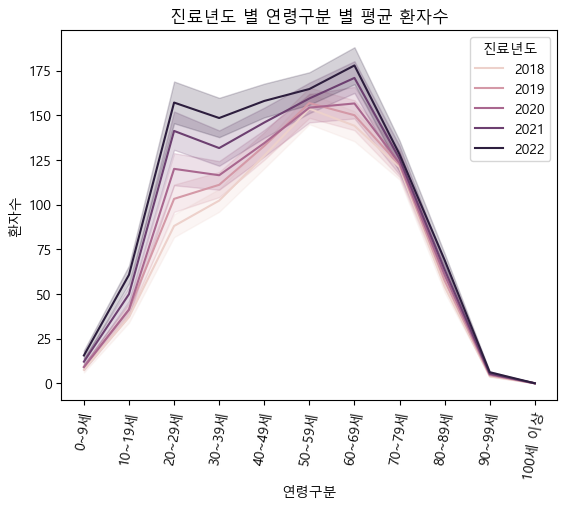

In [36]:
sns.lineplot(data=df, x="연령구분", y="환자수",hue= '진료년도')
plt.title('진료년도 별 연령구분 별 평균 환자수',loc='center')
plt.xticks(rotation=80)

Text(0.5, 1.0, '진료년도 별 상별구분 별 평균 환자수')

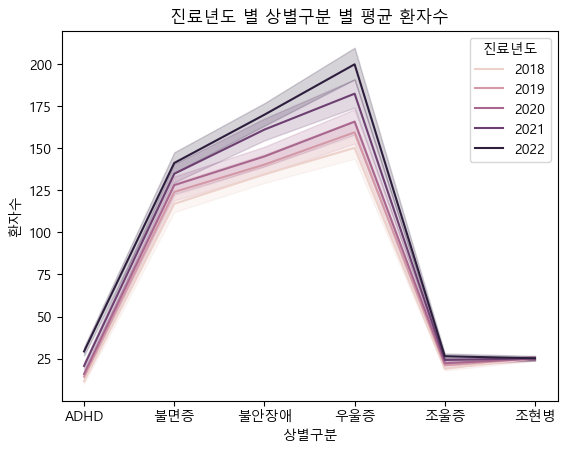

In [38]:
sns.lineplot(data=df, x='상별구분', y="환자수",hue= '진료년도')
plt.title('진료년도 별 상별구분 별 평균 환자수',loc='center')

# 4. 탐색적연구

#### Step0] 데이터 분석을 위한 목적, 대상 또는 주요 가설을 세워본다. 주요가설 도출 후 우선순위를 설정한다.

* 정보 : 연령구분과 성별에 따른 환자 수를 보니 20세 미만에서는 남성의 정신질환 환자가 많지만 이후에는 모든 연령대에서 여성의 정신질환 환자가 많았다. 또, 상별구분 별 성별 별 입내원일수를 보니 남성의 ADHD환자 수가 유일하게 여성보다 앞섰다.

    * 가설 : 20세 미만에서 남성의 정신질환 환자 수가 많은 이유는 여성에 비해 ADHD의 비중이 크기 때문일 것이다.
    * 가설 : 여성이 20세 이후에서 주요 정신질환 환자가 많은 이유는 남성에 비해 우울증(결혼, 육아 등의 요인으로 인한) 비중이 크기 때문일 것이다.  

* 정보 : 모든 권역에서 TOP 3 정신질환은 우울증, 불안장애, 불면증이었다. 그리고 권역별 요양급여비용_십만 데이터를 보면, Top3는 우울증, 조현병, 불안장애였다. 또, 입내원일수가 길 수록 요양급여비용이 많이 든다.

    * 가설 : 조현병은 환자수가 적지만 높은 요양급여비용이 든다. 이를 토대로 보면, 조현병 환자의 입내원일수가 다른 질병에 비해 길 것이다.

* 정보 : 그래프를 확인한 결과, 정신질환자의 수는 년도에 따라 증가하고 있다.
* 정보 : 입내원일수가 길수록 요양급여비용은 증가하고 있다.

    * 가설 : 정신질환자의 수는 년도에 따라 증가하고 있고, 입내원일수도 증가하고 있다. 그에 따라 요양급여비용도 년도에 따라 증가할 것이다.

* 목적 : 정신질환자의 수가 증가하고 있을 때, 정부는 각 질환에 맞춰서 대책을 세워야하는지, 특정 연령대에 맞춰서 대책을 세워야 하는지 에 대해서.

* 위의 목적을 바탕으로 5개년간 연령구분 별 환자수는 특정 연령대에서 급격히 증가했다. 그리고 상별구분 별 환자수는 우울증, 불안장애, 불면증 순서대로 많이 증가했다.

* 이를 기반으로 보면, 20대, 30대, 60대에서 우울증과 불안장애, 불면증이 늘었다고 볼 수 있다. 

#### Step1] 우선순위가 높은 가설을 구체화 한다.
* 예) 나이와 월급간에 상관관계가 있을 것이다. (40~60대 사이에서 급여가 가장 높을 것이다)

* 가설 : 20세 미만에서 남성의 정신질환 환자 수가 많은 이유는 여성에 비해 ADHD의 비중이 크기 때문일 것이다.
* 가설 : 여성이 20세 이후에서 주요 정신질환 환자가 많은 이유는 남성에 비해 우울증(결혼, 육아 등의 요인으로 인한) 비중이 크기 때문일 것이다.
* 가설 : 조현병은 환자수가 적지만 높은 요양급여비용이 든다. 이를 토대로 보면, 조현병 환자의 입내원일수가 다른 질병에 비해 길 것이다.
* 가설 : 정신질환자의 수는 년도에 따라 증가하고 있고, 입내원일수도 증가하고 있다. 그에 따라 요양급여비용도 년도에 따라 증가할 것이다.

#### Step2] 가설증명: 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다. 
* 예) 나이별 월급에 대한 평균값을 구하고 line차트로 시각화하여 추세를 파악하여 가설을 검증한다.

##### 가설 1,2 검증 데이터

Text(0.5, 1.0, '상별구분 별 성별 별 환자 수')

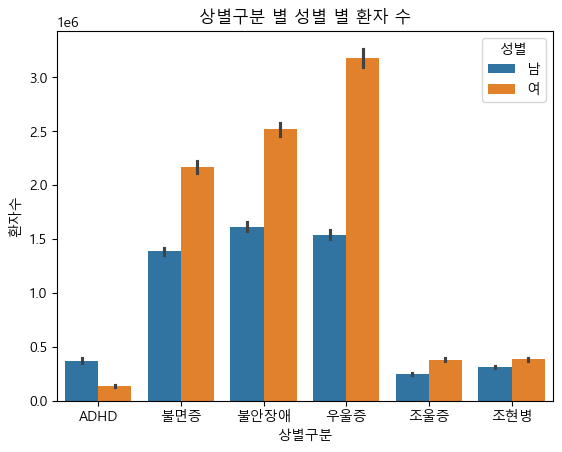

In [39]:
# 가설 1,2 검증 데이터

sns.barplot(data=df, x="상별구분", y="환자수", hue = '성별',estimator=sum)
plt.title('상별구분 별 성별 별 환자 수',loc='center')

##### 가설 3 검증 데이터

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(-10000.0, 0, '-10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

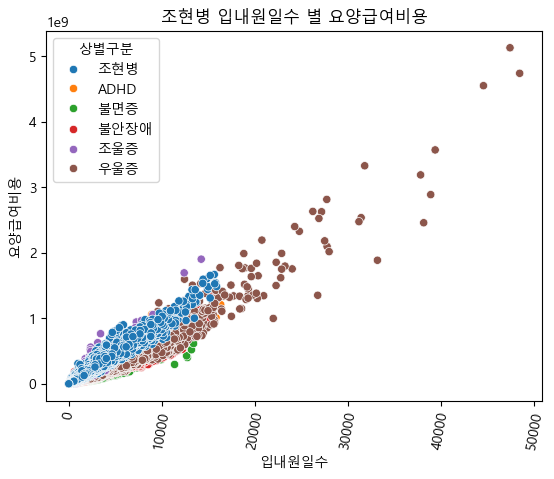

In [40]:
# 가설 3 검증 데이터
hue_order = ['조현병','ADHD','불면증','불안장애','조울증','우울증']
sns.scatterplot(data=df, x="입내원일수", y="요양급여비용", hue = '상별구분',hue_order = hue_order)
plt.title('조현병 입내원일수 별 요양급여비용',loc='center')
plt.xticks(rotation=80)

#####  가설 4 검증 데이터

Text(0.5, 1.0, '진료년도 별 요양급여비용_십만')

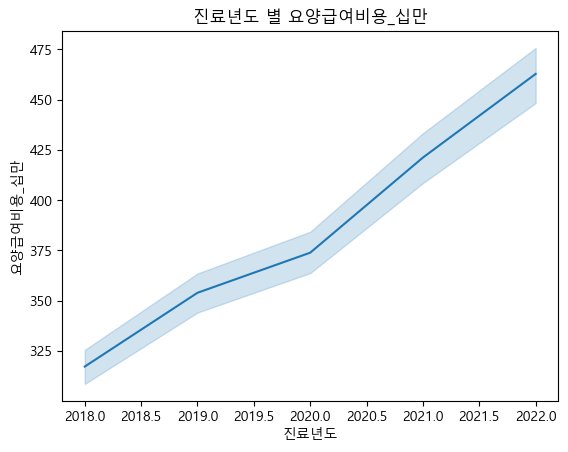

In [41]:
sns.lineplot(data=df, x="진료년도", y="요양급여비용_십만")
plt.title('진료년도 별 요양급여비용_십만',loc='center')


#### Step3] 가설결론: 해당 가설에 대한 결론을 내린다.

결론 : 남성의 ADHD 환자 수가 여성보다 많은 것으로 보아, 

첫번째 가설 ' 20세 미만에서 남성의 정신질환 환자 수가 많은 이유는 여성에 비해 ADHD의 비중이 크기 때문일 것이다.' 는 맞는 가설로 검증되었다

결론 : 여성의 우울증 환자 수가 남성보다 훨씬 많은 것으로 보아,

두번째 가설 '여성이 20세 이후에서 주요 정신질환 환자가 많은 이유는 남성에 비해 우울증(결혼, 육아 등의 요인으로 인한) 비중이 크기 때문일 것이다.' 는 맞는 가설로 검증되었다.

결론 : 우울증의 입내원일수 별 요양급여비용이 제일 높아,

세번째 가설 '조현병 환자의 입내원일수가 다른 질병에 비해 길 것이다.'는 틀린 가설임이 검증되었다.

결론 : 진료년도 별 요양급여비용_십만의 데이터가 년도에 따라 증가하는 추세를 보이고 있어,

네번째 가설 '정신질환자의 수는 년도에 따라 증가하고 있고, 입내원일수도 증가하고 있다. 그에 따라 요양급여비용도 년도에 따라 증가할 것이다.'는 맞는 가설로 검증되었다.

네번째 가설을 토대로 목적 : 정신질환자의 수가 증가하고 있을 때, 정부는 각 질환에 맞춰서 대책을 세워야하는지, 특정 연령대에 맞춰서 대책을 세워야 하는지에 대해 고민

* 위의 목적을 바탕으로 5개년간 연령구분 별 환자수는 특정 연령대에서 급격히 증가했다. 그리고 상별구분 별 환자수는 우울증, 불안장애, 불면증 순서대로 많이 증가했다.

이를 기반으로 생각해보면, 20대, 30대, 60대에서 우울증과 불안장애, 불면증이 늘었다고 볼 수 있다. 

#### Step4] 탐색적연구 반복:
* 추가 가설을 설정하고 가설의 우선순위를 재조정한다.
* 시간 일정이 허락하는 범위내에서 Step1~Step3를 반복한다.

#### Step5] 최종결론: 지금까지 진행했던 모든 탐색적연구의 결과를 반영하여 최종 결론을 내린다.

남성의 ADHD환자는 20대 이전에서 여성에 비해 많이 발생했다. 그리고 연도가 증가함에 따라 20대, 30대, 60대 환자수가 다른 연령대에 비해 확연히 증가하고 있으며, 주요 정신질환 중 우울증과 불안장애, 불면증이 급격히 증가하는 모양을 보였다. 또, 조현병 환자의 요양급여비용이 우울증을 제외한 다른 질환에 비해 상당히 높았지만, 그에 따른 환자수는 그렇게 증가하지 않았다. 

따라서 정부가 정책을 조정하여 요양급여비용의 최적화를 하기 위해서는, 고정비용인 조현병이나 조울증보다는 우울증, 불안장애, 불면증의 치료에, 그리고 특정 연령대(20대, 30대, 60대)에 좀 더 집중적인 지원을 해야 하며, 20대 이전 남성 ADHD 환자에 대해서는 추가적인 추세관찰이 필요하다.

## 결과의 그래프

([0, 1, 2, 3, 4],
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

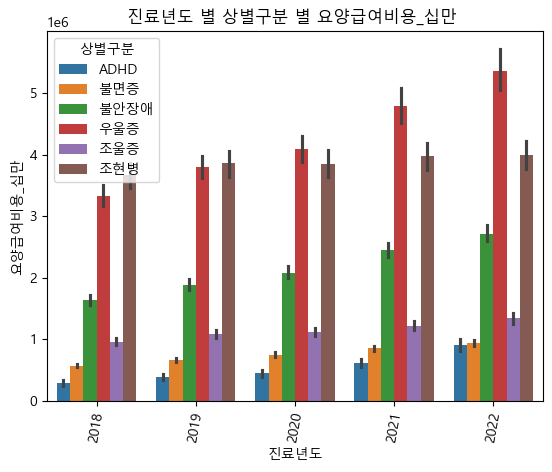

In [44]:
sns.barplot(data=df, x="진료년도", y="요양급여비용_십만",hue = '상별구분',estimator=sum)
plt.title('진료년도 별 상별구분 별 요양급여비용_십만 ',loc='center')
plt.xticks(rotation=80)

([0, 1, 2, 3, 4],
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

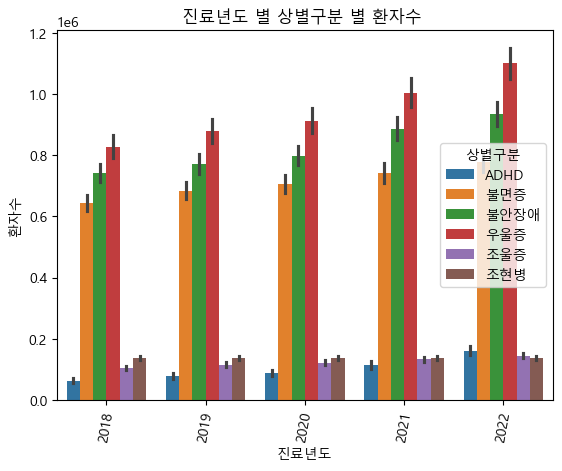

In [45]:
sns.barplot(data=df, x="진료년도", y="환자수",hue = '상별구분',estimator=sum)
plt.title('진료년도 별 상별구분 별 환자수 ',loc='center')
plt.xticks(rotation=80)